In [8]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Load the CSV file
df = Path("Data/PBJ_Daily_Nurse_Staffing_Q1_2024.csv")
df = pd.read_csv(df, encoding='cp1252')

C:\Users\NKaur\AppData\Local\Temp\ipykernel_19060\1658897411.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df, encoding='cp1252')


Step 1: Data Cleaning and Preparation
Objective: Prepare the dataset for analysis by handling missing values, converting date formats, and ensuring data consistency.

What We're Doing:
Dropping irrelevant columns: We want to focus on relevant columns for the analysis, such as staffing hours and census data. By dropping irrelevant columns, we remove unnecessary data and make the dataset more manageable.

Converting date formats: The WorkDate column needs to be in a datetime format to facilitate time-based analysis (such as grouping by date, month, or quarter).

Handling missing values: Missing data can invalidate calculations. We remove rows where critical information (such as staffing hours or census numbers) is missing to ensure that our calculations are accurate

In [ ]:
# Change the date format
df['WorkDate'] = pd.to_datetime(df['WorkDate'], format='%Y%m%d', errors='coerce')

# Drop rows where 'MDScensus' or 'WorkDate' is NaN
df.dropna(subset=['MDScensus', 'WorkDate'], inplace=True)

# Make sure using only 2024Q1 data
df_q1_2024 = df[df['CY_Qtr'] == '2024Q1']

OUTPUT: A clean dataset (df_q1_2024) with relevant columns and valid data for the first quarter of 2024.
       The WorkDate column is now in datetime format, and rows with missing critical information are removed.

--LETS UNDERSTAND THE DATA SET FIRST--

This dataset contains information related to nurse staffing, organized by provider numbers and various staffing metrics for different categories of nursing personnel. Here’s a breakdown of each column:

PROVNUM: Unique identifier for the healthcare provider.

PROVNAME: Name of the provider facility.

CITY: City where the provider is located.

STATE: State where the provider is located.

COUNTY_NAME: Name of the county where the provider is situated.

COUNTY_FIPS: FIPS (Federal Information Processing Standards) code for the county, a unique numerical identifier for geographic locations within the U.S.

CY_Qtr: The calendar year and quarter (e.g., Q1 for the first quarter) to specify the reporting period.

WorkDate: Date of the specific staffing data entry.

Staffing Census and Hours
MDScensus: Patient census count for a given date (often represents the number of patients needing care).

Hrs_RNDON: Total hours worked by Registered Nurse (RN) Directors of Nursing.

Hrs_RNDON_emp: Hours worked by employee RNs in the Director of Nursing role.
Hrs_RNDON_ctr: Hours worked by contracted RNs in the Director of Nursing role.
Hrs_RNadmin: Total hours worked by RN Administrators (administrative RNs not in direct care).

Hrs_RNadmin_emp: Hours worked by employee RN Administrators.
Hrs_RNadmin_ctr: Hours worked by contracted RN Administrators.
Hrs_RN: Total hours worked by general RNs (Registered Nurses) in patient care.

Hrs_RN_emp: Hours worked by employee RNs.
Hrs_RN_ctr: Hours worked by contracted RNs.
Hrs_LPNadmin: Total hours worked by Licensed Practical Nurses (LPNs) in administrative roles.

Hrs_LPNadmin_emp: Hours worked by employee LPNs in administrative roles.
Hrs_LPNadmin_ctr: Hours worked by contracted LPNs in administrative roles.
Hrs_LPN: Total hours worked by LPNs in direct patient care.

Hrs_LPN_emp: Hours worked by employee LPNs.
Hrs_LPN_ctr: Hours worked by contracted LPNs.
Hrs_CNA: Total hours worked by Certified Nursing Assistants (CNAs) in direct patient care.

Hrs_CNA_emp: Hours worked by employee CNAs.
Hrs_CNA_ctr: Hours worked by contracted CNAs.
Hrs_NAtrn: Total hours worked by Nurse Aides in training.

Hrs_NAtrn_emp: Hours worked by employee Nurse Aides in training.
Hrs_NAtrn_ctr: Hours worked by contracted Nurse Aides in training.
Hrs_MedAide: Total hours worked by Medication Aides (assist with medication administration).

Hrs_MedAide_emp: Hours worked by employee Medication Aides.
Hrs_MedAide_ctr: Hours worked by contracted Medication Aides.
Summary
This data provides an in-depth look at staffing across different roles in a healthcare facility and helps analyze the distribution of hours worked by employee vs. contracted staff across different nursing categories. This dataset is particularly useful for examining staffing patterns, determining adequate staffing levels, and ensuring compliance with care standards.

Step 2: Calculate Total Staffing Hours for Each Day
Objective: Calculate the total number of staffing hours worked by RNs, LPNs, and CNAs for each nursing home on each day.

What We're Doing:
Calculate staffing-to-census ratio: We sum up the total hours worked by all nursing personnel (RNs, LPNs, and CNAs) for each day and divide by the MDScensus (resident count) to obtain the staffing-to-census ratio.

Group by nursing home: We then group the data by PROVNUM (provider number) and PROVNAME (provider name) to calculate the average staffing-to-census ratio per facility.

Sort the data: We sort the resulting table by staffing-to-census ratio to identify nursing homes with the highest and lowest staffing levels relative to their census.

In [42]:
# Calculate staffing hours per resident for each day for each nursing home
df_q1_2024['staffing_to_census'] = (
    df_q1_2024[['Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_RN', 'Hrs_LPNadmin', 'Hrs_LPN', 'Hrs_CNA']].sum(axis=1)
    / df_q1_2024['MDScensus']
)

# Create a summary table by nursing home to see overall staffing ratios
staffing_by_home = df_q1_2024.groupby(['PROVNUM', 'PROVNAME'])['staffing_to_census'].mean().reset_index()

# Sort by staffing ratio
staffing_by_home = staffing_by_home.sort_values(by='staffing_to_census')
print(staffing_by_home)

      PROVNUM                                     PROVNAME  staffing_to_census
5334   315471                        ST CATHERINE OF SIENA            0.025044
12463  285243                          PARKVIEW HOME, INC.            0.223767
5014   265667                            MEYER CARE CENTER            0.237725
11685  185133                            TRADEWATER POINTE            0.312259
991    105672                           GULF COAST VILLAGE            0.317102
...       ...                                          ...                 ...
8343   495167                WYTHE CNTY COMMUNITY HOSP ECU                 inf
14485  525731      ST ANN HEALTH AND REHABILITATION CENTER                 inf
14325  515184  PINE VIEW NURSING AND REHABILITATION CENTER                 inf
10892  085017      WILLOWBROOKE COURT AT COKESBURY VILLAGE                 inf
10985  105178  HERITAGE HEALTHCARE & REHABILITATION CENTER                 inf

[14658 rows x 3 columns]


Output:
staffing_by_home: A DataFrame showing each nursing home's average staffing-to-census ratio. The data is sorted in ascending order of staffing ratio.

Step 3: Calculate Employee vs. Contracted Staffing Ratio
Objective: Analyze the staffing composition in terms of full-time employees vs. contractors.

What We're Doing:
Calculate total staffing hours for employees and contractors: We sum the hours worked by employees and contractors separately for each role (e.g., RN, LPN, CNA).

Calculate the contractor staffing ratio: We compute the proportion of staffing hours provided by contractors (staffing_ctr) relative to the total staffing hours (employee + contractor). This ratio is calculated for each day.

Group by nursing home: We compute the average contractor staffing ratio for each nursing home.

Sort by contractor reliance: We sort the homes based on the contractor staffing ratio to prioritize homes more reliant on contractors.

In [39]:
# Calculate total hours for employees and contractors
df_q1_2024['staffing_emp'] = df_q1_2024[['Hrs_RNDON_emp', 'Hrs_RNadmin_emp', 'Hrs_RN_emp', 'Hrs_LPNadmin_emp', 'Hrs_LPN_emp', 'Hrs_CNA_emp']].sum(axis=1)
df_q1_2024['staffing_ctr'] = df_q1_2024[['Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr']].sum(axis=1)

# Calculate the proportion of contractor vs employee staffing per day
df_q1_2024['contractor_ratio'] = df_q1_2024['staffing_ctr'] / (df_q1_2024['staffing_emp'] + df_q1_2024['staffing_ctr'])

# Calculate contractor staffing proportion by nursing home
contractor_proportions = df_q1_2024.groupby(['PROVNUM', 'PROVNAME'])['contractor_ratio'].mean().reset_index()

# Sort by contractor reliance
contractor_proportions = contractor_proportions.sort_values(by='contractor_ratio', ascending=False) 
print(contractor_proportions)

      PROVNUM                                        PROVNAME  \
6054   345296                 MARGATE HEALTH AND REHAB CENTER   
1137   105910             CORAL REEF SUBACUTE CARE CENTER LLC   
12541  295048                           HARMON HOSPITAL - SNF   
1512   115551                   CUMMING OPERATING COMPANY LLC   
1384   115343                          BERRIEN NURSING CENTER   
...       ...                                             ...   
14637  555223           ST. JOHN'S HOSPITAL CAMARILLO D/P SNF   
8403   495248            BURKE HEALTH & REHABILITATION CENTER   
14639  555227                                     VILLA MARIN   
14656  555259                            MAINPLACE POST ACUTE   
21      15049  EASTERN SHORE REHABILITATION AND HEALTH CENTER   

       contractor_ratio  
6054                1.0  
1137                1.0  
12541               1.0  
1512                1.0  
1384                1.0  
...                 ...  
14637               0.0  
8403       

Output:
contractor_proportions: A DataFrame showing the contractor staffing ratio for each nursing home. This table is sorted by the ratio to identify homes with higher contractor reliance.

Step 4: Analyze Employee vs. Contracted Hours by Role
Objective: Compare the total hours worked by employees and contractors for different nursing roles (RN, LPN, CNA).

What We're Doing:
Summing hours by role: We sum the hours worked by employees and contractors separately for each role (RN, LPN, CNA).

Plotting the data: We create a stacked bar chart to visualize the total hours worked by employees and contractors for each role. This helps identify which roles are more reliant on contractors.

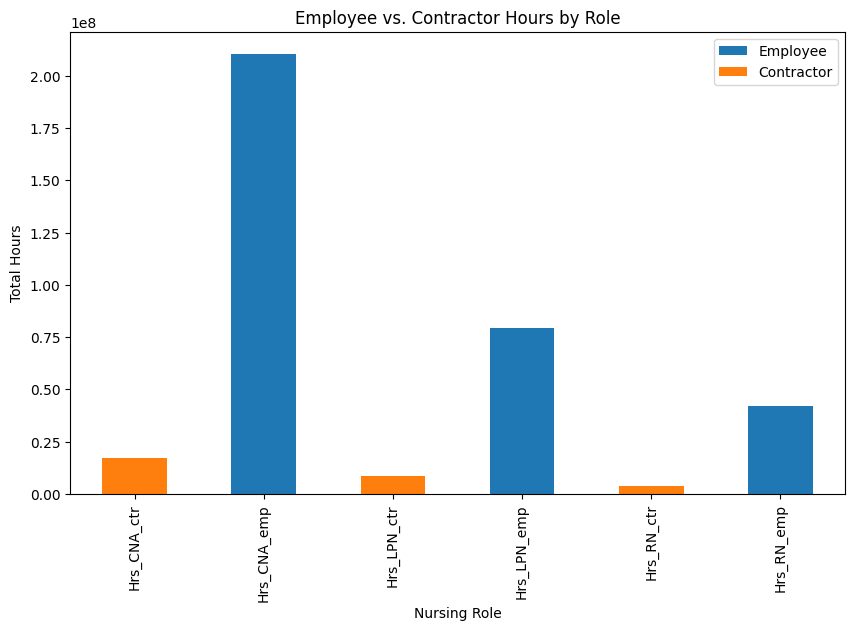

In [40]:
roles = ['RN', 'LPN', 'CNA']
employee_hours = df_q1_2024[[f'Hrs_{role}_emp' for role in roles]].sum()
contractor_hours = df_q1_2024[[f'Hrs_{role}_ctr' for role in roles]].sum()


staffing_type_df = pd.DataFrame({'Employee': employee_hours, 'Contractor': contractor_hours})
staffing_type_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Employee vs. Contractor Hours by Role')
plt.xlabel('Nursing Role')
plt.ylabel('Total Hours')
plt.show()

Output:
A stacked bar chart visualizing the total hours worked by employees and contractors for each role (RN, LPN, CNA). The chart allows you to see the breakdown of staffing by role and employment type.

Step 5: Visualize Staffing Comparison Across Regions
Objective: Visualize the staffing-to-resident ratio across regions (e.g., counties or states).

What We're Doing:
Group by region: We aggregate the data by COUNTY_NAME (or STATE) and calculate the average staffing-to-census ratio.

Visualize regional trends: A bar plot is created to display staffing levels across different regions. The higher the staffing-to-census ratio, the more staffing there is relative to the number of residents.

In [ ]:

# Grouping the data by County (or State) to get the average staffing-to-resident ratio
staffing_by_county = df_q1_2024.groupby('COUNTY_NAME')['staffing_to_census'].mean().reset_index()

# Sorting the values by staffing-to-census ratio
staffing_by_county = staffing_by_county.sort_values(by='staffing_to_census', ascending=False)

# Plotting the bar chart for staffing-to-census ratio by county
plt.figure(figsize=(34, 248))
sns.barplot(x='staffing_to_census', y='COUNTY_NAME', data=staffing_by_county, palette="coolwarm")
plt.title('Average Staffing-to-Resident Ratio by County')
plt.xlabel('Average Staffing-to-Resident Ratio')
plt.ylabel('County')
plt.grid(True, axis='x')
plt.show()

C:\Users\NKaur\AppData\Local\Temp\ipykernel_19060\350383428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='staffing_to_census', y='COUNTY_NAME', data=staffing_by_county, palette="coolwarm")


Output:
A bar chart showing the average staffing-to-census ratio by county. The regions with the highest and lowest staffing ratios will be immediately visible.

Step 6: Visualize Staffing-to-Census Ratio by State
Objective: Visualize the staffing levels across states and identify regional trends.

What We're Doing:
Group by state: We group the data by state and calculate the average staffing-to-census ratio.

Create a bar plot: A bar plot visualizes how staffing varies across states, helping identify states with staffing gaps.

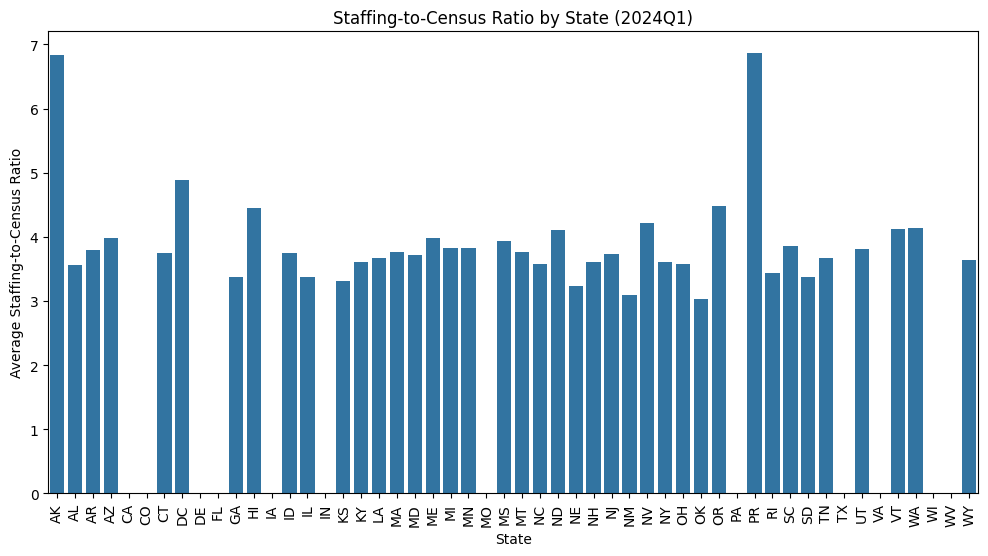

In [24]:
# Average staffing-to-census ratio by state (or county, if preferred)
regional_staffing = df_q1_2024.groupby('STATE')['staffing_to_census'].mean().reset_index()

# Plot regional staffing-to-census ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE', y='staffing_to_census', data=regional_staffing)
plt.xticks(rotation=90)
plt.title('Staffing-to-Census Ratio by State (2024Q1)')
plt.xlabel('State')
plt.ylabel('Average Staffing-to-Census Ratio')
plt.show()

Output:
A bar chart showing the staffing-to-census ratio for each state. This helps identify regions with staffing shortages or surpluses.

Step 7: Identify Homes with Consistent Low Staffing
Objective:
Identify nursing homes that are consistently under-staffed based on the staffing-to-census ratio.

What We're Doing:
Defining a threshold for low staffing (e.g., below the median staffing-to-census ratio).
Flagging homes with staffing ratios consistently below this threshold.
Displaying homes that are under-staffed for more than a specified number of days (e.g., more than 5 days).

In [26]:
# Define a threshold for identifying "low staffing" (e.g., below the median staffing-to-census ratio)
staffing_threshold = df_q1_2024['staffing_to_census'].median()

# Create a flag to identify low staffing records
df_q1_2024['low_staffing'] = df_q1_2024['staffing_to_census'] < staffing_threshold

# Identify homes with consistently low staffing
low_staffing_homes = df_q1_2024[df_q1_2024['low_staffing']].groupby(['PROVNUM', 'PROVNAME'])['low_staffing'].count().reset_index()
low_staffing_homes = low_staffing_homes[low_staffing_homes['low_staffing'] > 5]  # Example threshold for consistency

# Display homes with consistent low staffing
print(low_staffing_homes)

      PROVNUM                                     PROVNAME  low_staffing
0       15009                     BURNS NURSING HOME, INC.            14
1       15010               COOSA VALLEY HEALTHCARE CENTER            17
2       15012                   HIGHLANDS HEALTH AND REHAB             9
3       15014  EASTVIEW REHABILITATION & HEALTHCARE CENTER            79
4       15015                PLANTATION MANOR NURSING HOME            51
...       ...                                          ...           ...
13136  555240      TURLOCK NURSING & REHABILITATION CENTER             6
13137  555244    ANBERRY NURSING AND REHABILITATION CENTER            40
13138  555246                        VISTA VIEW POST ACUTE            15
13139  555249                  SEA CLIFF HEALTHCARE CENTER            19
13141  555256     THE REHABILITATION CENTER OF BAKERSFIELD            11

[11897 rows x 3 columns]


Output:
A table that lists homes with consistent low staffing (those that have been under-staffed for more than 5 days), allowing for targeted intervention or further analysis.

Final Output Summary:
The final outputs of the analysis will help identify homes with chronic low staffing, regional differences in staffing levels, and the reliance on contractors versus employees. The tables and visualizations can then inform staffing decisions, outreach efforts, and targeted interventions in under-staffed regions or homes.